In [1]:
## train classifier
import os
import torch
os.environ["CUDA_VISIBLE_DEVICES"]="6"
print('Num. of cuda visible devices: %d' %torch.cuda.device_count(), list(range(torch.cuda.device_count())))  

Num. of cuda visible devices: 1 [0]


In [44]:
class Options():
    def __init__(self):

        self.batch_size= 32
        self.beta1= 0.9
        self.beta2= 0.999
        self.checkpoint= None
        self.checkpoint_dir= 'checkpoints'
        self.data_root= '/media/dataserver/workspace/blanca/training_datasets/classifier/training'
        self.drop_out= 0
        self.finetune= False
        self.gpu_ids= [0]
        self.lr= 0.002
        self.lr_decay= 50
        self.model= 'resnet' #'densenet' #'vgg19' # 
        self.name= 'new'
        self.nc_input= 4
        self.nepochs= 200
        self.not_save= False
        self.nworkers= 16
        self.optimizer= 'adam'
        self.phase= 'train'
        self.phases= ['train', 'val']
        self.target_size= (224, 224)
        
opt= Options()

expr_dir = os.path.join(opt.checkpoint_dir, opt.name)
if not os.path.exists(expr_dir): os.makedirs(expr_dir)

In [45]:
from importlib import reload
import sys, os
sys.path.append(os.getcwd())
from models import fitting_classifier

# Setting the data loaders
from models.fitting_classifier.ClassDataset import *
from models.fitting_classifier.data_loading import *
datasets, dataloaders = set_dataloaders(opt)
datasets_sizes = {x: len(datasets[x]) for x in opt.phases}

Setting /media/dataserver/workspace/blanca/training_datasets/classifier/training/train/good_fit as 1: 
shuffling...done
Setting /media/dataserver/workspace/blanca/training_datasets/classifier/training/train/bad_fit as 0: 
shuffling...done
shuffling...done
Setting /media/dataserver/workspace/blanca/training_datasets/classifier/training/val/good_fit as 1: 
shuffling...done
Setting /media/dataserver/workspace/blanca/training_datasets/classifier/training/val/bad_fit as 0: 
shuffling...done
shuffling...done
dataset [train] was created with 2054 images
dataset [val] was created with 128 images


#### Visualizing inputs to D and C

In [46]:
import sys
from importlib import reload
sys.path.append('/media/dataserver/workspace/blanca/utils')
import libraries
import utils_global
reload(utils_global)

from utils_global import *
%matplotlib inline

#### C input

0.0 255.0 (224, 224, 4) [ 1.]
0.0 255.0 (224, 224, 4) [ 0.]
0.0 255.0 (224, 224, 4) [ 0.]
0.0 255.0 (224, 224, 4) [ 0.]
0.0 255.0 (224, 224, 4) [ 1.]
0.0 255.0 (224, 224, 4) [ 1.]


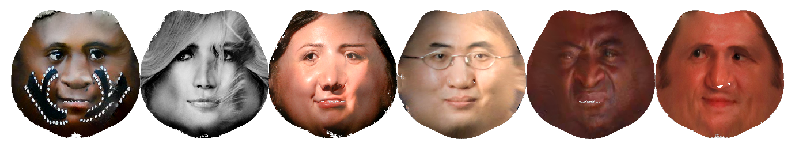

In [47]:
def get_and_plot_item_C(index, plot=True):
    data, label = datasets['train'].__get_x_item__(index)
    im = data.numpy().transpose(1, 2, 0)
    im = ((im + 1) / 2) * 255
    print(np.min(im), np.max(im), im.shape, label.numpy())
    if plot: plot_im(im)
    return im

ims = []
for i in range (6):
    ims.append(get_and_plot_item_C(i, plot=False))

plot_ims(ims)

#### D input

In [66]:
print(os.getcwd())
import data
reload(data)
from data.data_loader import CreateDataLoader

class OptionsP2P():
    def __init__(self):
        self.batchSize = 1
#         self.dataroot = '/media/dataserver/workspace/blanca/training_datasets/pix2pix/'
        self.dataroot= '/media/dataserver/workspace/blanca/training_datasets/classifier/training'
#         self.dataset_list = ['images_target_clean_classified', 'video_target_clean_classified']
        self.dataset_list = ['train', 'val']
        self.isTrain = True
        self.label_nc = 0
        self.output_nc = 3
        self.loadSize = 256
        self.fill = 'W'
        self.no_lsgan = False
        self.serial_batches = False
        self.nThreads = 16
        self.max_dataset_size = 10e10

optP2P = OptionsP2P()
data_loader = CreateDataLoader(optP2P)
dataset = data_loader.load_data()
dataset_size = len(data_loader)
print('#training images = %d' % dataset_size)
# for i, data in enumerate(dataset):
#     if i==0: 
#         print(i)
#         for k, v in data.items(): 
#             print(k)
#     else: break

/media/dataserver/workspace/blanca/project/wip/pix2pixHD
CustomDatasetDataLoader
shuffling...done
shuffling...done
shuffling...done
2054
shuffling...done
shuffling...done
shuffling...done
2182
dataset [AlignedDataset] was created
#training images = 2182


In [67]:
def get_and_plot_item_P2P(index, plot=True):
    
    data_dic = data_loader.dataset.__get_x_item__(index)
#     for k, v in data_dic.items(): print(k)

    ims = []
    for k, v in data_dic.items():
        if isinstance(v, (str, list, int)): continue
        else:
            try:
                im = data_dic[k].numpy().transpose(1, 2, 0)
                im = ((im + 1) / 2) * 255
                print(k, np.min(im), np.max(im), im.shape)
                ims.append(im)
            except:
                try:
                    im = data_dic[k]
                    im = ((im + 1) / 2) * 255
                    print(k, np.min(im), np.max(im), im.shape)
                    ims.append(im)
                except:
                    label = data_dic[k]
                    print(k, label.numpy())
    plot_ims(ims)

input 0.0 255.0 (256, 256, 3)
target 0.0 255.0 (256, 256, 3)
target4C 0.0 255.0 (224, 224, 4)
input_mask 0.0 255.0 (256, 256)
label [ 0.]


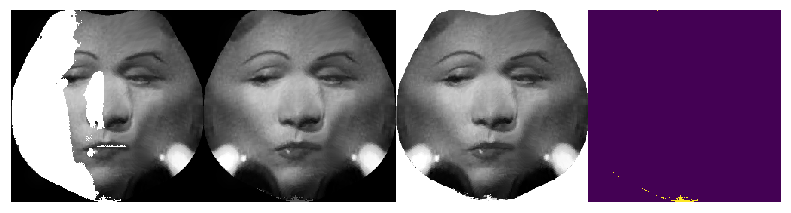

input 0.0 255.0 (256, 256, 3)
target 0.0 231.0 (256, 256, 3)
target4C 0.0 255.0 (224, 224, 4)
input_mask 0.0 255.0 (256, 256)
label [ 1.]


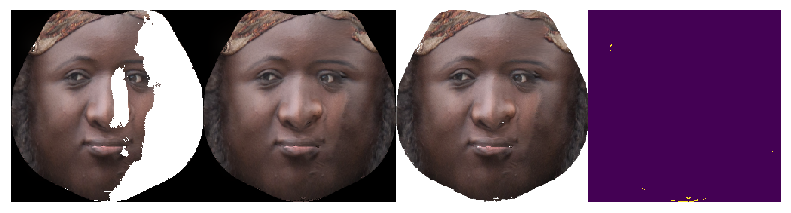

input 0.0 255.0 (256, 256, 3)
target 0.0 238.0 (256, 256, 3)
target4C 0.0 255.0 (224, 224, 4)
input_mask 0.0 255.0 (256, 256)
label [ 0.]


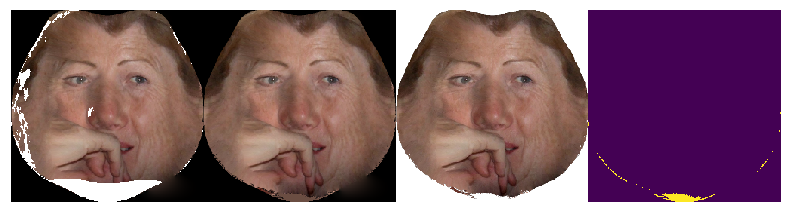

input 0.0 255.0 (256, 256, 3)
target 0.0 235.0 (256, 256, 3)
target4C 0.0 255.0 (224, 224, 4)
input_mask 0.0 255.0 (256, 256)
label [ 0.]


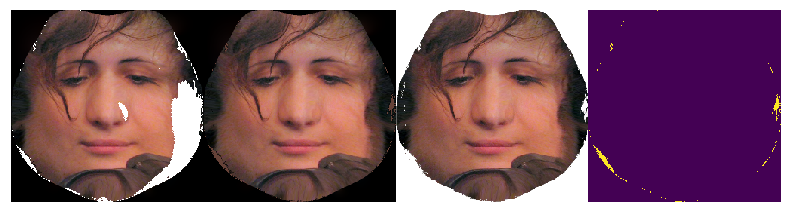

input 0.0 255.0 (256, 256, 3)
target 0.0 239.0 (256, 256, 3)
target4C 0.0 255.0 (224, 224, 4)
input_mask 0.0 255.0 (256, 256)
label [ 0.]


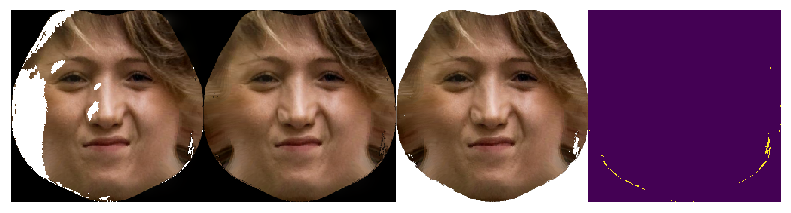

input 0.0 255.0 (256, 256, 3)
target 0.0 255.0 (256, 256, 3)
target4C 0.0 255.0 (224, 224, 4)
input_mask 0.0 255.0 (256, 256)
label [ 0.]


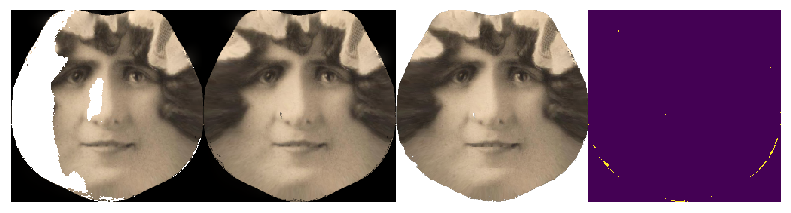

input 0.0 255.0 (256, 256, 3)
target 0.0 255.0 (256, 256, 3)
target4C 0.0 255.0 (224, 224, 4)
input_mask 0.0 255.0 (256, 256)
label [ 1.]


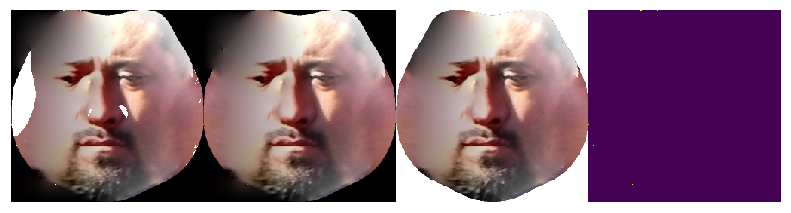

input 0.0 255.0 (256, 256, 3)
target 0.0 244.0 (256, 256, 3)
target4C 0.0 255.0 (224, 224, 4)
input_mask 0.0 255.0 (256, 256)
label [ 0.]


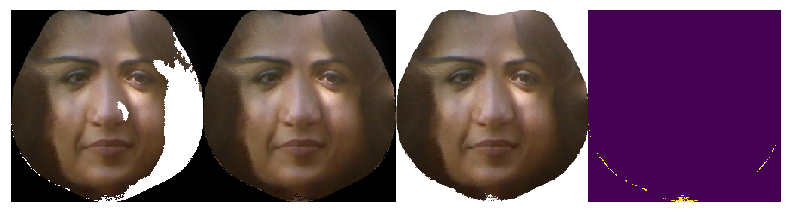

input 0.0 255.0 (256, 256, 3)
target 0.0 252.0 (256, 256, 3)
target4C 0.0 255.0 (224, 224, 4)
input_mask 0.0 255.0 (256, 256)
label [ 0.]


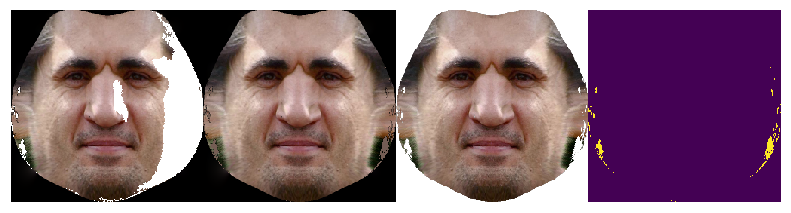

input 0.0 255.0 (256, 256, 3)
target 0.0 199.0 (256, 256, 3)
target4C 0.0 255.0 (224, 224, 4)
input_mask 0.0 255.0 (256, 256)
label [ 1.]


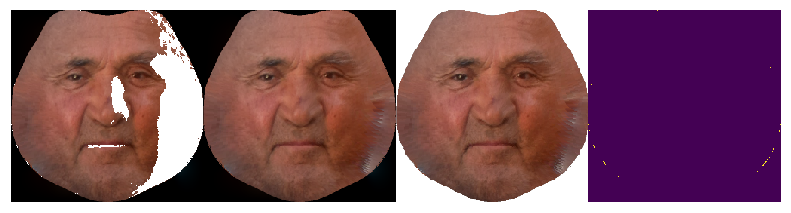

In [68]:
for i in range(10, 20):
    get_and_plot_item_P2P(i)

input 0.0 255.0 (256, 256, 3)
target 0.0 255.0 (256, 256, 3)
target4C 0.0 255.0 (224, 224, 4)
input_mask 0.0 255.0 (256, 256)
label [ 1.]


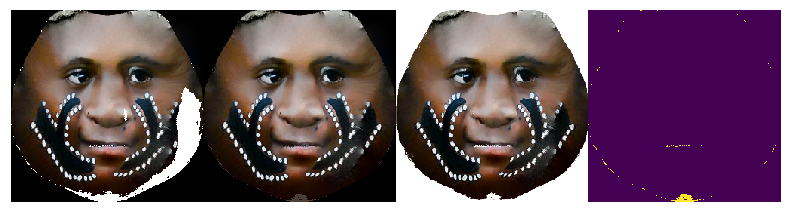

input 0.0 255.0 (256, 256, 3)
target 0.0 238.0 (256, 256, 3)
target4C 0.0 255.0 (224, 224, 4)
input_mask 0.0 255.0 (256, 256)
label [ 0.]


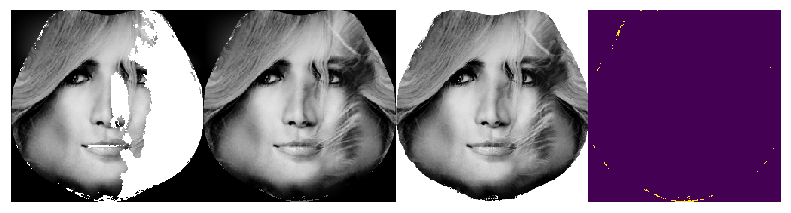

input 0.0 255.0 (256, 256, 3)
target 0.0 255.0 (256, 256, 3)
target4C 0.0 255.0 (224, 224, 4)
input_mask 0.0 255.0 (256, 256)
label [ 0.]


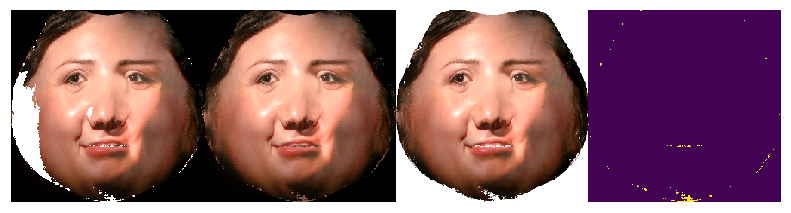

input 0.0 255.0 (256, 256, 3)
target 0.0 255.0 (256, 256, 3)
target4C 0.0 255.0 (224, 224, 4)
input_mask 0.0 255.0 (256, 256)
label [ 0.]


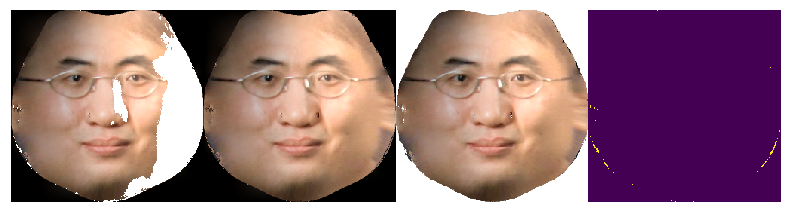

input 0.0 255.0 (256, 256, 3)
target 0.0 192.0 (256, 256, 3)
target4C 0.0 255.0 (224, 224, 4)
input_mask 0.0 255.0 (256, 256)
label [ 1.]


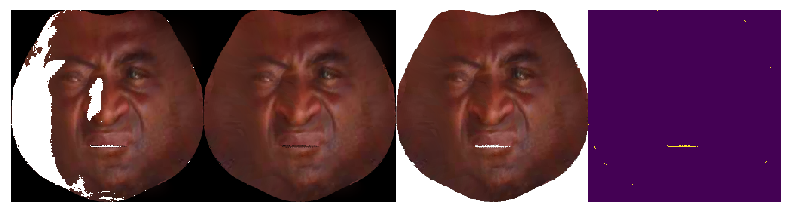

input 0.0 255.0 (256, 256, 3)
target 0.0 229.0 (256, 256, 3)
target4C 0.0 255.0 (224, 224, 4)
input_mask 0.0 255.0 (256, 256)
label [ 1.]


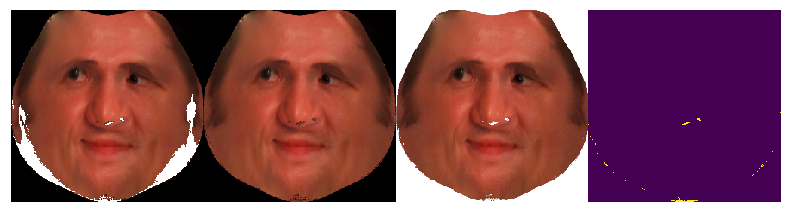

input 0.0 255.0 (256, 256, 3)
target 0.0 189.0 (256, 256, 3)
target4C 0.0 255.0 (224, 224, 4)
input_mask 0.0 255.0 (256, 256)
label [ 1.]


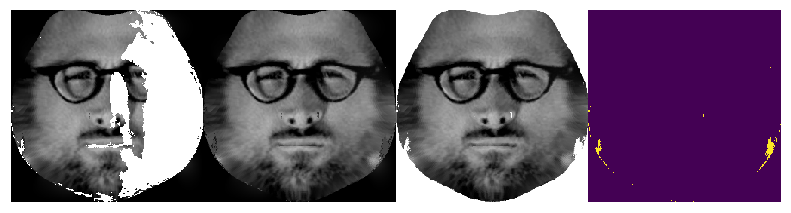

input 0.0 255.0 (256, 256, 3)
target 0.0 255.0 (256, 256, 3)
target4C 0.0 255.0 (224, 224, 4)
input_mask 0.0 255.0 (256, 256)
label [ 1.]


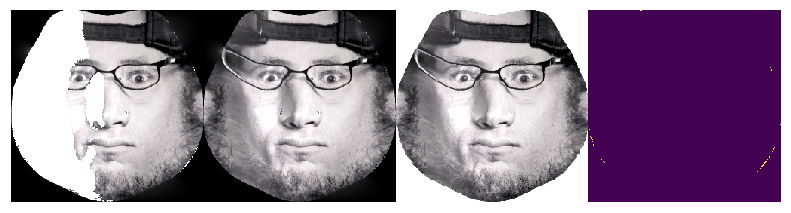

input 0.0 255.0 (256, 256, 3)
target 0.0 255.0 (256, 256, 3)
target4C 0.0 255.0 (224, 224, 4)
input_mask 0.0 255.0 (256, 256)
label [ 0.]


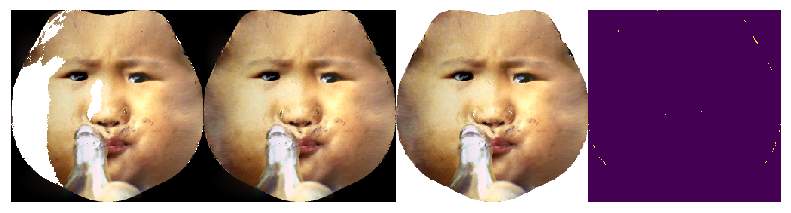

input 0.0 255.0 (256, 256, 3)
target 0.0 232.0 (256, 256, 3)
target4C 0.0 255.0 (224, 224, 4)
input_mask 0.0 255.0 (256, 256)
label [ 0.]


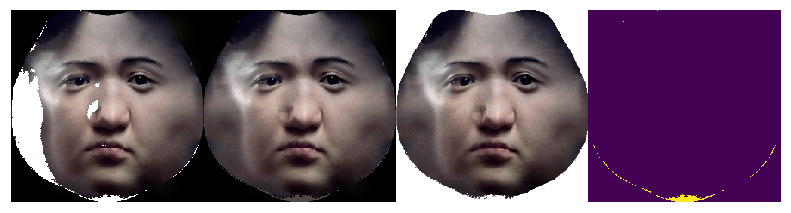

In [25]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline 

# def show(img):
#     plt.imshow(img, cmap="gray")
#     plt.show()

# def ocr(img):
#     # Tesseract mode settings:
#     #   Page Segmentation mode (PSmode) = 3 (defualt = 3)
#     #   OCR Enginer Mode (OEM) = 3 (defualt = 3)
#     tesser = cv2.text.OCRTesseract_create('C:/Program Files/Tesseract 4.0.0/tessdata/','eng','0123456789',3,3)
#     retval = tesser.run(img, 0) # return string type
#     print ('OCR Output: ' + retval)

# # Directly feed image to Tesseact
# img = cv2.imread('./imagesStackoverflow/SmallDigits-x4.png')
# ocr(im1)

# # Load image as gray scale 
# img = cv2.imread('./imagesStackoverflow/SmallDigits-x4.png', 0);
# show(im1)
# ocr(im1)

# # Enhance image and get same positive result
# ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY) 
# kernel = np.ones((3,3), np.uint8)
# img = cv2.erode(thresh, kernel, iterations = 1)
# show(img)
# ocr(img)

error: /home/travis/miniconda/conda-bld/conda_1486587069159/work/opencv-3.1.0/build/opencv_contrib/modules/text/src/ocr_tesseract.cpp:187: error: (-215) (image.type() == CV_8UC1) || (image.type() == CV_8UC3) in function run


In [10]:
res = models.resnet18(pretrained=True)
res.fc

Linear(in_features=512, out_features=1000, bias=True)

In [29]:
for i, j in res._modules.items():
    print(i)

conv1
bn1
relu
maxpool
layer1
layer2
layer3
layer4
avgpool
fc
